In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

## load data

In [2]:
train_df = pd.read_csv('data/train_set.csv')

In [3]:
train_df.head()

,Unnamed: 0,g0495+ctrl,g0261+g0760,g0232+ctrl,g0083+g0599,g0461+ctrl,g0160+g0495,g0276+ctrl,g0147+g0241,g0200+g0605,...,g0261+g0013.39,g0186+g0868.39,g0228+g0780.39,g0186+g0216.39,g0520+ctrl.39,g0927+g0852.39,g0671+ctrl.39,g0301+g0139.39,g0843+ctrl.39,g0061+ctrl.39
0,g0001,0.016378,1.066582,0.000000,0.000000,0.434476,0.001927,0.000000,0.000000,1.355243,...,0.010157,0.621668,0.000000,0.000830,0.012849,0.596048,0.007868,0.000000,0.503691,0.494527
1,g0002,0.005795,1.055038,0.467867,0.002771,0.005256,0.000000,0.482638,0.001186,0.000000,...,0.454502,1.013297,0.018614,0.005107,0.000000,0.008325,0.729548,0.000081,0.010975,0.499198
2,g0003,1.077192,0.000000,1.615947,1.095600,2.291888,0.622666,1.959727,0.005043,1.695185,...,2.173926,1.957292,0.891706,0.004772,1.486960,1.427854,0.737765,1.168904,1.721672,1.830649
3,g0004,1.087270,0.003542,0.017293,0.000000,0.440990,0.001127,0.010667,0.004690,0.901058,...,0.469801,0.624264,0.005365,0.000000,0.000000,0.621874,1.151926,0.525821,0.829042,0.000000
4,g0005,0.668079,0.000175,1.365268,0.003322,0.975067,0.977491,0.497815,0.004708,0.911088,...,1.643346,0.612687,1.676331,0.000000,1.470796,0.950370,0.738596,1.339436,0.501294,1.093151


In [4]:
train_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
train_df.shape

(1000, 7080)

In [6]:
train_df.head()

,g0495+ctrl,g0261+g0760,g0232+ctrl,g0083+g0599,g0461+ctrl,g0160+g0495,g0276+ctrl,g0147+g0241,g0200+g0605,g0761+g0157,...,g0261+g0013.39,g0186+g0868.39,g0228+g0780.39,g0186+g0216.39,g0520+ctrl.39,g0927+g0852.39,g0671+ctrl.39,g0301+g0139.39,g0843+ctrl.39,g0061+ctrl.39
0,0.016378,1.066582,0.000000,0.000000,0.434476,0.001927,0.000000,0.000000,1.355243,0.971529,...,0.010157,0.621668,0.000000,0.000830,0.012849,0.596048,0.007868,0.000000,0.503691,0.494527
1,0.005795,1.055038,0.467867,0.002771,0.005256,0.000000,0.482638,0.001186,0.000000,0.603827,...,0.454502,1.013297,0.018614,0.005107,0.000000,0.008325,0.729548,0.000081,0.010975,0.499198
2,1.077192,0.000000,1.615947,1.095600,2.291888,0.622666,1.959727,0.005043,1.695185,1.805936,...,2.173926,1.957292,0.891706,0.004772,1.486960,1.427854,0.737765,1.168904,1.721672,1.830649
3,1.087270,0.003542,0.017293,0.000000,0.440990,0.001127,0.010667,0.004690,0.901058,0.596910,...,0.469801,0.624264,0.005365,0.000000,0.000000,0.621874,1.151926,0.525821,0.829042,0.000000
4,0.668079,0.000175,1.365268,0.003322,0.975067,0.977491,0.497815,0.004708,0.911088,0.599888,...,1.643346,0.612687,1.676331,0.000000,1.470796,0.950370,0.738596,1.339436,0.501294,1.093151


## EDA

#### *for g0261 and g0760*

In [7]:
test1_first = 'g0261+ctrl.39'
test1_second = 'g0760+ctrl.39'

In [8]:
train_array1 = train_df[test1_first]

In [9]:
train_array2 = train_df[test1_second]

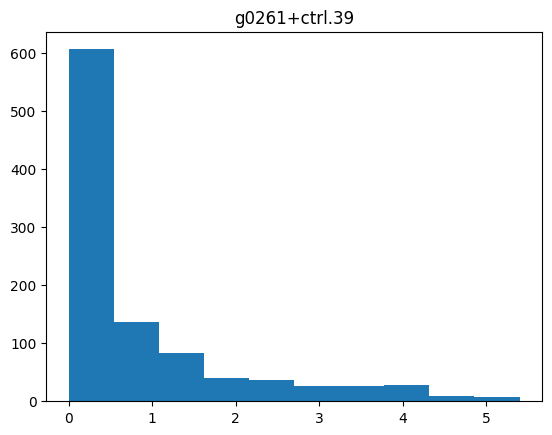

In [10]:
plt.hist(train_array1)
plt.title(test1_first)
plt.show()

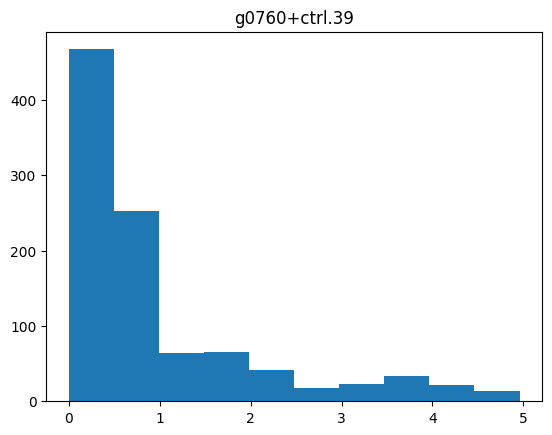

In [11]:
plt.hist(train_array2)
plt.title(test1_second)
plt.show()

In [12]:
test_label3 = 'g0261+g0760'
train_array3 = train_df[test_label3]

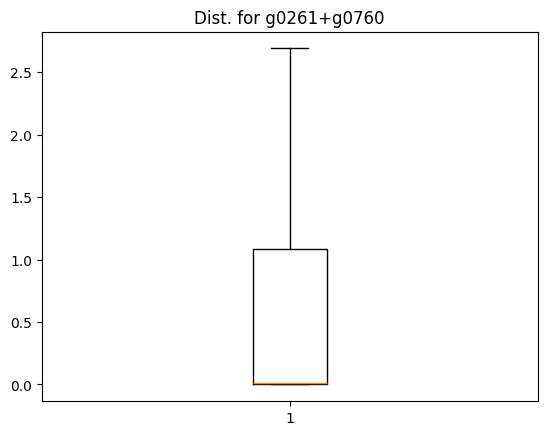

In [13]:
plt.boxplot(x = train_array3, showfliers = False)
plt.title(f'Dist. for {test_label3}')
plt.show()

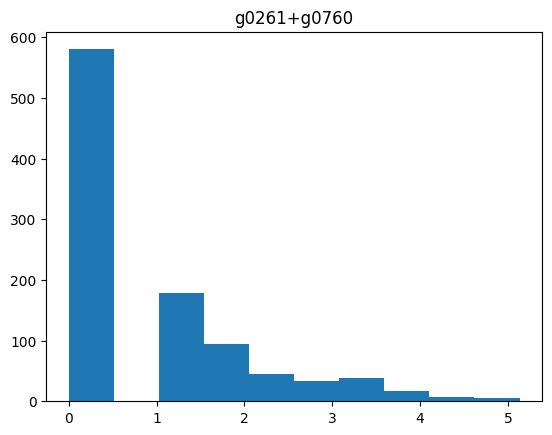

In [14]:
plt.hist(train_array3)
plt.title(f'{test_label3}')
plt.show()

all data follows poisson distribution

#### *for g0083 and g0599*

In [15]:
g83 = train_df['g0083+ctrl']
g599 = train_df['g0599+ctrl.39']
combined = train_df ['g0083+g0599']

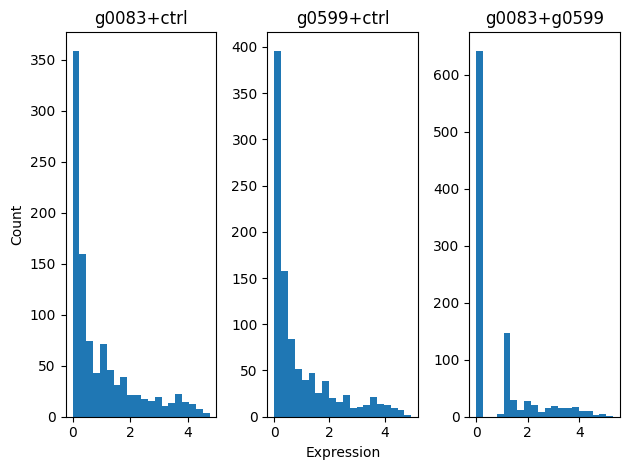

In [16]:
arrays = [g83, g599, combined]
titles = ['g0083+ctrl', 'g0599+ctrl', 'g0083+g0599']
          
fig, axs = plt.subplots(1, 3, sharex = False, sharey = False)

for ax, arr in enumerate(arrays):
    axs[ax].hist(arr, bins = 20)
    axs[ax].set_title(f'{titles[ax]}')

    if ax == 1: axs[ax].set_xlabel('Expression')
    if ax == 0: axs[ax].set_ylabel('Count')
plt.tight_layout()
plt.show()

obviously all poisson!

## poisson model prediction

#### initial model

In [35]:
g83 = train_df['g0083+ctrl']
g599 = train_df['g0599+ctrl']
added = g83 + g599 # what about multiplying by factor? grid search?

combined = train_df ['g0083+g0599']

In [36]:
g83 = np.reshape(g83, (1000,1))
g599 = np.reshape(g599, (1000,1))
combined = np.reshape(combined, (1000,1))
added = np.reshape(added, (1000,1))

In [37]:
train_concat = np.concatenate([g83, g599, added], axis = 1)
train_concat.shape

(1000, 3)

In [38]:
# perform parameter tuning
model = PoissonRegressor(alpha = 5).fit(train_concat[:, :2], train_concat[:, 2])

In [39]:
predict_arr = np.concatenate([g83, g599], axis = 1)

In [40]:
regmodel_predictions = model.predict(predict_arr)

In [41]:
regmodel_predictions.shape

(1000,)

In [42]:
combined.shape

(1000, 1)

In [43]:
combined = combined.flatten()
len(combined)

1000

In [44]:
hist_data = [regmodel_predictions, combined]

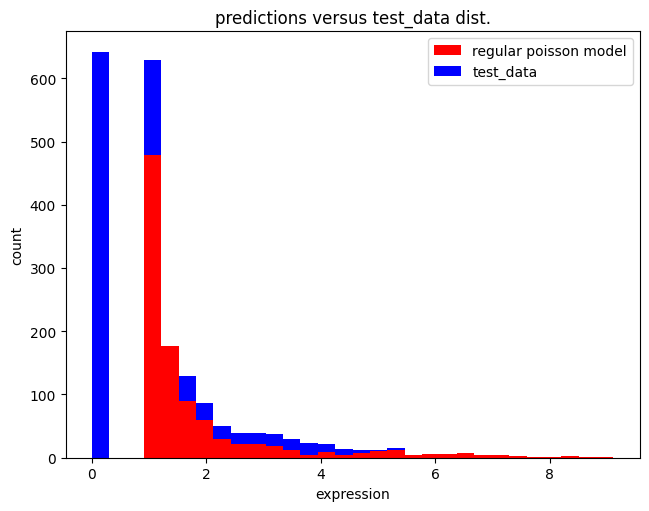

In [45]:
plt.hist(x = hist_data, stacked = True, color = ['red', 'blue'], label = ['regular poisson model', 'test_data'], bins = 30)
plt.legend()
plt.tight_layout()
plt.xlabel('expression')
plt.ylabel('count')
plt.title('predictions versus test_data dist.')
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(combined, regmodel_predictions))
print(f'Regular Poisson Model: RMSE = {rmse:.3f}')

Regular Poisson Model: RMSE = 1.295


#### model optimization

In [51]:
gradient = HistGradientBoostingRegressor(loss = 'poisson').fit(train_concat[:,:2], train_concat[:,-1])

In [52]:
predictions = gradient.predict(added)

ValueError: X has 1 features, but HistGradientBoostingRegressor is expecting 2 features as input.

In [ ]:
hist_data =  [regmodel_predictions.flatten(), combined.flatten(), predictions.flatten()]

In [ ]:
len(hist_data)

3

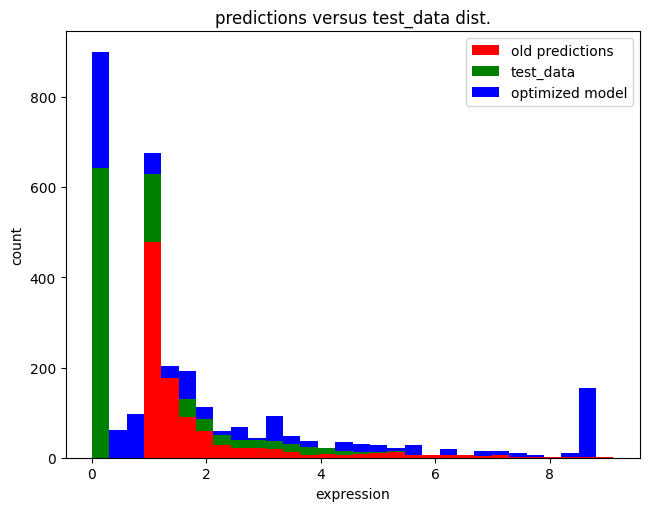

In [ ]:
cmap = plt.get_cmap('plasma')
colors = ['r', 'g', 'b']
length = len(hist_data)
plt.hist(x = hist_data, stacked = True, color = colors[:length], label = ['old predictions', 'test_data', 'optimized model'], bins = 30)
plt.legend()
plt.tight_layout()
plt.xlabel('expression')
plt.ylabel('count')
plt.title('predictions versus test_data dist.')
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(combined, predictions))
print(f'Boosted Poisson Model: RMSE = {rmse:.3f}')

Boosted Poisson Model: RMSE = 3.254


## generalize poisson model to predict on all data

#### train model on average for each single perturbation and define relevant functions

In [116]:
def get_means(gene1: str, gene2: str, df):
    """
    get means for two arrays to input into predict function, returns concatenated array of means
    """
    col_lst = list(df.columns)

    gene1_lst = []
    gene2_lst = []
    for col in col_lst:
        split_col = col.split(sep = '+')
        if gene1 in split_col[0] and 'ctrl' in split_col[1]: gene1_lst.append(split_col)
        elif gene2 in split_col[0] and 'ctrl' in split_col[1]: gene2_lst.append(split_col)

    final_gene1_lst = ['+'.join(arr) for arr in gene1_lst]
    final_gene2_lst = ['+'.join(arr) for arr in gene2_lst]
    gene1_df = train_df[final_gene1_lst]
    gene2_df = train_df[final_gene2_lst]
    mean1_df = np.array(np.mean(gene1_df, 1)).reshape(1000,1)
    mean2_df = np.array(np.mean(gene2_df, 1)).reshape(1000,1)
    return np.concat([mean1_df, mean2_df], 1)

In [141]:
def arr_prediction(gene1, gene2, train_df, poisson = True): 
        mean_df = get_means(gene1, gene2, train_df)
        gene1_lst = []
        gene2_lst = []

        col_lst = list(train_df.columns)
        for col in col_lst:
                split_col = col.split(sep = '+')
                if gene1 in split_col[0] and 'ctrl' in split_col[1]: gene1_lst.append(split_col)
                elif gene2 in split_col[0] and 'ctrl' in split_col[1]: gene2_lst.append(split_col)

        gene1_lst = ['+'.join(arr) for arr in gene1_lst]
        gene2_lst = ['+'.join(arr) for arr in gene2_lst]
        gene1_df = train_df[gene1_lst]
        gene2_df = train_df[gene2_lst]
        added = np.array(gene1_df) + np.array(gene2_df) # what about multiplying by factor? grid search?

        combined = train_df['+'.join([gene1, gene2])]
        gene1_df = np.reshape(gene1_df, (40000,1))
        gene2_df = np.reshape(gene2_df, (40000,1))
        combined = np.reshape(combined, (1000,1))
        added = np.reshape(added, (40000,1))
        train_concat = np.concatenate([gene1_df, gene2_df, added], axis = 1)
        train_concat.shape

        # perform parameter tuning
        if poisson: model = PoissonRegressor(alpha = 7).fit(train_concat[:, :2], train_concat[:, 2])
        else: model = HistGradientBoostingRegressor(loss = 'poisson', learning_rate = 1, max_iter = 100).fit(train_concat[:, :2], train_concat[:, 2])
        return model.predict(mean_df)
        
        """
        combined = combined.flatten()
        hist_data = [regmodel_predictions, combined]
        plt.hist(x = hist_data, stacked = True, color = ['red', 'blue'], label = ['regular poisson model', 'test_data'], bins = 30)
        plt.legend()
        plt.tight_layout()
        plt.xlabel('expression')
        plt.ylabel('count')
        plt.title(f'predictions versus test_data dist. ({gene1}, {gene2})')
        plt.show()
        rmse = np.sqrt(mean_squared_error(combined, regmodel_predictions))
        print(f'Regular Poisson Model: RMSE = {rmse:.3f}')
        print(f'shape of predictions: {regmodel_predictions.shape}')
        """

In [143]:
prediction1 = arr_prediction(gene1 = 'g0422', gene2 = 'g0013', train_df = train_df)

In [144]:
prediction1.shape

(1000,)

#### EDA on number of samples for single/double perturbs

In [14]:
train_df.columns

Index(['g0495+ctrl', 'g0261+g0760', 'g0232+ctrl', 'g0083+g0599', 'g0461+ctrl',
       'g0160+g0495', 'g0276+ctrl', 'g0147+g0241', 'g0200+g0605',
       'g0761+g0157',
       ...
       'g0261+g0013.39', 'g0186+g0868.39', 'g0228+g0780.39', 'g0186+g0216.39',
       'g0520+ctrl.39', 'g0927+g0852.39', 'g0671+ctrl.39', 'g0301+g0139.39',
       'g0843+ctrl.39', 'g0061+ctrl.39'],
      dtype='object', length=7080)

In [15]:
test_col = train_df.columns[6043]
train_df.columns[6043]

'g0084+ctrl.37'

In [16]:
test_split = test_col.split(sep = '+')
test_split

['g0084', 'ctrl.37']

In [17]:
columns_lst = list(train_df.columns)

In [18]:
len(columns_lst)

7080

we have 7080 total samples in train data

In [19]:
columns_lst = [item for sub_arr in columns_lst for item in sub_arr.split(sep = '+')]

In [20]:
len(columns_lst)

14120

In [21]:
columns_lst[567]

'ctrl.2'

In [22]:
columns_lst = [item for item in columns_lst if 'ctrl' not in item]

In [23]:
np.unique(columns_lst, return_counts = True)

(array(['g0013', 'g0013.1', 'g0013.10', ..., 'g0979', 'g0984', 'g0989'],
       dtype='<U8'),
 array([123,   3,   3, ...,  40,  40,  40]))

In [24]:
for i in columns_lst: print(i)

g0495
g0261
g0760
g0232
g0083
g0599
g0461
g0160
g0495
g0276
g0147
g0241
g0200
g0605
g0761
g0157
g0013
g0495
g0101
g0422
g0013
g0927
g0805
g0873
g0157
g0083
g0200
g0564
g0400
g0698
g0207
g0744
g0232
g0924
g0034
g0707
g0157
g0262
g0534
g0638
g0491
g0261
g0013
g0844
g0957
g0965
g0655
g0974
g0160
g0852
g0852
g0256
g0787
g0317
g0534
g0612
g0022
g0160
g0495.1
g0013
g0534
g0612.1
g0109
g0379
g0301
g0139
g0301
g0612
g0301
g0844
g0301
g0422
g0139
g0013
g0186
g0228
g0422
g0612
g0510
g0195
g0927
g0805.1
g0109
g0787
g0852
g0147
g0698
g0697
g0787
g0655
g0301
g0751
g0200
g0605.1
g0612
g0317
g0655
g0186
g0868
g0698
g0062
g0844
g0671
g0083
g0633
g0787
g0655.1
g0256
g0698
g0207.1
g0927
g0495
g0301
g0139.1
g0564
g0200
g0301
g0751.1
g0698
g0207.2
g0186
g0868.1
g0417
g0965
g0655.1
g0534
g0612.2
g0285
g0109
g0262
g0805
g0780
g0085
g0232
g0147
g0241
g0147
g0241.1
g0698
g0207.3
g0200
g0083
g0633.1
g0262
g0698
g0207.4
g0681
g0256
g0371
g0784
g0691
g0631
g0787
g0805
g0013
g0034
g0379
g0285
g0261
g0160
g0922
g0